In [1]:
import matplotlib.pyplot as plt
import os
# REPLACE WITH THE PATH TO THE 'bakalarkaFY' PROJECT FOLDER ON YOUR SYSTEM
os.chdir("C:\\Users\\rmnso\\PycharmProjects\\bakalarkaFY")
from solver import solve_generic, solve_withN, solve_numerical
from input_parser import parse_input_file
from plot import simple_plot, plot_with_EN

### DIFFERENT Ns: ELECTRON CONCENTRATION

Takes a few seconds to run. Shows the effect of number of superparticles of electrons on the output. 

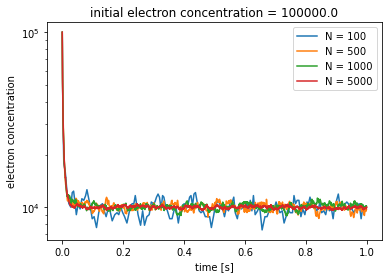

In [2]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N.input')
parameters['e'] = parameters['Ar^+'] = 1e5
parameters['Ar'] = 1e10

for N in [100, 500, 1000, 5000]:
    parameters_copy = parameters.copy()
    parameters_copy['N'] = N  # sets N manually, so there is no need to parse many input files, differing only in N
    times, values = solve_withN(all_species, parameters_copy, reactions)
    plt.plot(times, values['e'], label=f"N = {N}")

plt.xlabel("time [s]")
plt.ylabel("electron concentration")
plt.title(f"initial electron concentration = {parameters['e']}")
plt.legend()
plt.yscale("log")
plt.show()

### DIFFERENT Ns vs. DETERMINISTIC SOLUTION

Takes a few seconds to run. Used to produce a plot for the thesis.

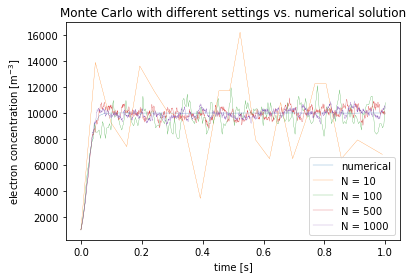

In [6]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N.input')
parameters['e'] = parameters['Ar^+'] = 1e3
parameters['Ar'] = 1e10

# numerical deterministic solution
times_num, values_num = solve_numerical(all_species, parameters, reactions)
plt.plot(times_num, values_num['e'], label="numerical", linewidth=0.25)

# different N approximation solution
for N in [10, 100, 500, 1000]:
    parameters_copy = parameters.copy()
    parameters_copy['N'] = N  # sets N manually, so there is no need to parse many input files, differing only in N
    times, values = solve_withN(all_species, parameters_copy, reactions)
    plt.plot(times, values['e'], label=f"N = {N}", linewidth=0.25)

plt.xlabel("time [s]")
plt.ylabel("electron concentration [$\\rm m^{-3}$]")
plt.title(f"Monte Carlo with different settings vs. numerical solution")
plt.legend()
# plt.savefig("graphs\\2reaction_differentN.png", dpi=512)
plt.show()

### COMPUTATION WITH CONSTANT WEIGHTS

I.e., the weight of an electron superparticle does not change during the computation.

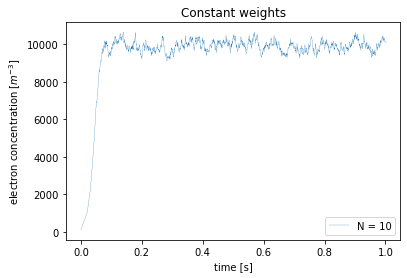

In [9]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N.input')
times, values = solve_withN(all_species, parameters, reactions, recompute_N=False)  # By setting recompute_N=False, you choose not to recompute electron superparticle weight -> superparticle population might change by a large amount
plt.plot(times, values['e'], label=f"N = {parameters['N']}", linewidth=0.25)
plt.xlabel("time [s]")
plt.ylabel("electron concentration [$m^{-3}$]")
plt.title(f"Constant weights")
plt.legend()
plt.show()

### COMPUTATION WITH VARIABLE WEIGHTS

I.e., the weight of an electron superparticle changes during the computation, if there are more than 2N or less than 0.5N electron superparticles. It changes the weights, so that there are N electron superparticles again.

Because, in this case, there are no more than 20 electron superparticles during the simulation, the output is much more chaotic. On the other hand, the computation is faster than in the previous case.

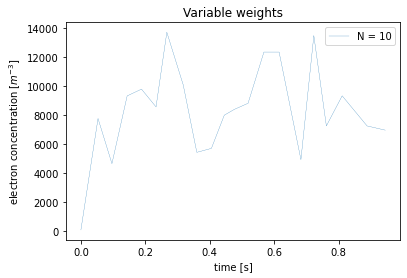

In [10]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N.input')
times, values = solve_withN(all_species, parameters, reactions, recompute_N=True)  # <- recompute_N is set to True
plt.plot(times, values['e'], label=f"N = {parameters['N']}", linewidth=0.25)
plt.xlabel("time [s]")
plt.ylabel("electron concentration [$m^{-3}$]")
plt.title(f"Variable weights")
plt.legend()
plt.show()

### UPDATE FUNCTION: E/N RAMP

The tool is able to handle outside parameters, which depend on the simulation time. These parameters are recomputed inside the update method.

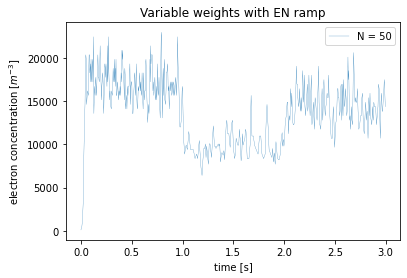

In [13]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N_withupdate.input')

# defines the E/N ramp
def update(parameters, time):
    if time < 1:
        parameters['EN'] = 50
    elif time < 2:
        parameters['EN'] = 20
    else:
        parameters['EN'] = 40

times, values = solve_withN(all_species, parameters, reactions, update=update, recompute_N=True)  # we keep the number of superparticles roughly constant during the simulation
plt.plot(times, values['e'], label=f"N = {parameters['N']}", linewidth=0.25)
plt.xlabel("time [s]")
plt.ylabel("electron concentration [$m^{-3}$]")
plt.title(f"Variable weights with EN ramp")
plt.legend()
plt.show()

### UPDATE FUNCTION: E/N RAMP - DETERMINISTIC SOLUTION vs. MC WITH NO APPROXIMATIONS

We use no approximations here: the solution takes about 15 mins.

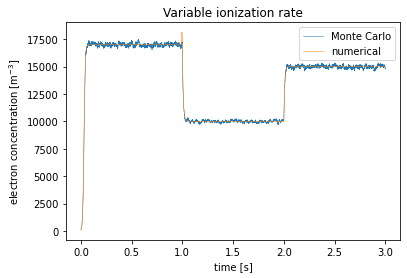

In [14]:
def update(parameters, time):
    if time < 1:
        parameters['EN'] = 50
    elif time < 2:
        parameters['EN'] = 20
    else:
        parameters['EN'] = 40

        
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N_withupdate.input')
parameters['N'] = parameters['e']  # use no approximation
parameters1 = parameters.copy()
parameters2 = parameters.copy()

times, values = solve_withN(all_species, parameters1, reactions, update=update, recompute_N=False)
plt.plot(times, values['e'], label="Monte Carlo", linewidth=0.5)

times, values = solve_numerical(all_species, parameters2, reactions, update=update)
plt.plot(times, values['e'], label="numerical", linewidth=0.5)

plt.xlabel("time [s]")
plt.ylabel("electron concentration [$\\rm m^{-3}$]")
plt.title(f"Variable ionization rate")
plt.legend()
# plt.savefig("graphs/ENramp.png", dpi=512)
plt.show()

### RECOMPUTING N

Takes about 2 mins to run.

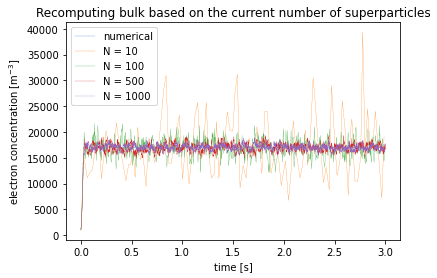

In [13]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N_withupdate.input')
parameters['e'] = parameters['Ar^+'] = 1e3
parameters['Ar'] = 1e10

# numerical solution
times_num, values_num = solve_numerical(all_species, parameters, reactions)
plt.plot(times_num, values_num['e'], label="numerical", linewidth=0.25)

# different N approximation solution
for N in [10, 100, 500, 1000]:
    parameters_copy = parameters.copy()
    parameters_copy['N'] = N  # sets N manually, so there is no need to parse many input files, differing only in N
    times, values = solve_withN(all_species, parameters_copy, reactions, recompute_N=True)
    plt.plot(times, values['e'], label=f"N = {N}", linewidth=0.25)

plt.xlabel("time [s]")
plt.ylabel("electron concentration [$\\rm m^{-3}$]")
plt.title(f"Recomputing bulk based on the current number of superparticles")
plt.legend()
# plt.savefig("graphs\\2reaction_recomputingN.png", dpi=512)
plt.show()

### EQUAL REACTION WEIGHTS - E/N ramp

Uses equal reaction weights method and compares it to the deterministic solution of the E/N ramp system. Takes about 15 mins to run. Could be much faster by not using generic functions and implementing one specifically for this problem.

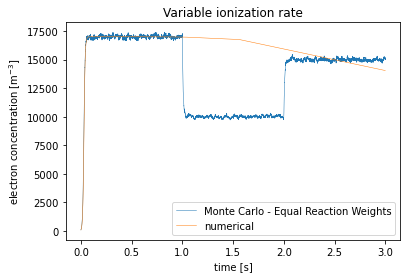

In [15]:
def update(parameters, time):
    if time < 1:
        parameters['EN'] = 50
    elif time < 2:
        parameters['EN'] = 20
    else:
        parameters['EN'] = 40

all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N_withupdate.input')
parameters1 = parameters.copy()
parameters2 = parameters.copy()

times, values = solve_generic(all_species, parameters1, reactions, update=update, bulk=1, ERW=True)  # no approximation
plt.plot(times, values['e'], label="Monte Carlo - Equal Reaction Weights", linewidth=0.5)

times, values = solve_numerical(all_species, parameters2, reactions, update=update, method='Radau')
plt.plot(times, values['e'], label="numerical", linewidth=0.5)

plt.xlabel("time [s]")
plt.ylabel("electron concentration [$\\rm m^{-3}$]")
plt.title(f"Variable ionization rate")
plt.legend()
# plt.savefig("graphs/ENrampEqReacWeights.png", dpi=512)
plt.show()

### EQUAL REACTION WEIGHTS vs. DETERMINISTIC SOLUTION vs. SIMPLE MC

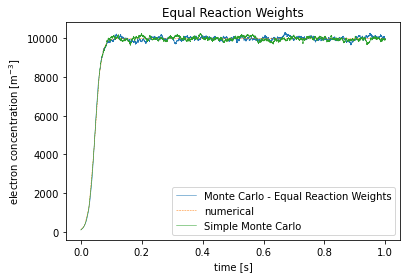

In [12]:
all_species, parameters, reactions, tables = parse_input_file('2reaction/2reaction_2N.input')
parameters['N'] = parameters['e']  # no approximation in simple MC
parameters1 = parameters.copy()
parameters2 = parameters.copy()
parameters3 = parameters.copy()

times, values = solve_generic(all_species, parameters1, reactions, bulk=1, ERW=True)  # bulk=1 -> no approximation
plt.plot(times, values['e'], label="Monte Carlo - Equal Reaction Weights", linewidth=0.5)

times, values = solve_numerical(all_species, parameters2, reactions)
plt.plot(times, values['e'], '--', label="numerical", linewidth=0.5)

times, values = solve_withN(all_species, parameters3, reactions, recompute_N=False)
plt.plot(times, values['e'], label="Simple Monte Carlo", linewidth=0.5)

plt.xlabel("time [s]")
plt.ylabel("electron concentration [$\\rm m^{-3}$]")
plt.title(f"Equal Reaction Weights")
plt.legend()
# plt.savefig("graphs/EqReactionWeights.png", dpi=512)
plt.show()